# Wildfire Smoke Controls on Gross Primary Production in Central Canada

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('max_columns', None)

In [9]:
data_in = pd.read_csv("drf_timeseries.csv", parse_dates=True, index_col=0)

In [10]:
#aod_in = pd.read_csv("aeronet_aod.csv", parse_dates=True)

#for key in aod_in.keys():
#    if key != "datetime":
#        data_in[key] = aod_in[key]

In [11]:
#data_in.to_csv("drf_timeseries.csv")

In [12]:
data_in

,datetime,smoke,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,AOD_551nm,AOD_532nm,AOD_531nm,AOD_510nm,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,Precipitable_Water(cm),AOD_681nm,AOD_709nm,Ozone(Dobson),NO2(Dobson),USTAR,TA,WD,WS,NEE_PI,FC,SC,H,SH,LE,SLE,G,TS_1,TS_2,P,RH,PA,CO2_1,CO2_2,VPD_PI,SWC_1,SWC_2,NETRAD,PPFD_IN,SW_IN,SW_DIF,PPFD_OUT,SW_OUT,LW_IN,LW_OUT,H2O,RECO_PI,APAR,PPFD_DIF,FAPAR,ZL
0,2005-08-05 0:00,0.0,NaN,0.043281,0.050140,NaN,NaN,0.056433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.077186,NaN,NaN,0.084066,NaN,NaN,0.095379,0.109326,0.503352,NaN,NaN,377.728603,0.155769,NaN,16.754,238.260,2.5785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5670,10.3795,0.0,61.7660,94.6780,NaN,NaN,0.7295,NaN,NaN,-38.485,0.000,0.06,NaN,0.000,0.105,335.240,373.680,NaN,NaN,NaN,1.6125,NaN,NaN
1,2005-08-05 1:00,0.0,NaN,0.041713,0.049306,NaN,NaN,0.055380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.077047,NaN,NaN,0.083923,NaN,NaN,0.094999,0.110109,0.510514,NaN,NaN,377.707512,0.155787,NaN,16.437,238.760,1.8935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2685,10.1695,0.0,60.0260,94.6620,NaN,NaN,0.7475,NaN,NaN,-35.440,-0.005,0.19,NaN,0.000,-0.005,334.600,370.220,NaN,NaN,NaN,1.5790,NaN,NaN
2,2005-08-05 2:00,0.0,NaN,0.037905,0.045268,NaN,NaN,0.050330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070703,NaN,NaN,0.075927,NaN,NaN,0.086224,0.100517,0.493424,NaN,NaN,377.680050,0.155811,NaN,16.347,248.315,2.3990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9970,9.9720,0.0,59.3995,94.6285,NaN,NaN,0.7550,17.0,27.47,-30.630,0.000,0.35,NaN,0.000,-0.045,337.985,369.005,NaN,NaN,NaN,1.6050,NaN,NaN
3,2005-08-05 3:00,0.0,NaN,0.034070,0.040381,NaN,NaN,0.044884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063583,NaN,NaN,0.067235,NaN,NaN,0.077404,0.091669,0.470614,NaN,NaN,377.652588,0.155835,NaN,16.077,252.895,1.8860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.7580,9.7935,0.0,60.1995,94.5740,NaN,NaN,0.7275,NaN,NaN,-45.005,0.000,0.00,NaN,0.000,-0.120,320.270,365.400,NaN,NaN,NaN,1.5550,NaN,NaN
4,2005-08-05 4:00,0.0,NaN,0.032243,0.038891,NaN,NaN,0.043012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060868,NaN,NaN,0.063953,NaN,NaN,0.075606,0.089504,0.507524,NaN,NaN,377.623732,0.155859,NaN,15.396,232.210,0.8960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5185,9.6225,0.0,60.8120,94.5105,NaN,NaN,0.6855,NaN,NaN,-46.400,0.160,-0.02,NaN,0.005,-0.290,314.705,361.375,NaN,NaN,NaN,1.8040,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130267,2020-06-14 19:00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130268,2020-06-14 20:00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130269,2020-06-14 21:00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130270,2020-06-14 22:00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Find which flux measurements have the most complete data

In [13]:
# check data for completeness
data_len = np.shape(data_in)[0]
for key in data_in.keys():
    if key != "datetime":
        not_nans = np.shape((data_in[np.isnan(data_in[key]) == False]))[0]
        completeness = not_nans / data_len * 100
        print(f"{key}:  {round(completeness,2)} %")

smoke:  99.52 %
AOD_1640nm:  3.48 %
AOD_1020nm:  5.23 %
AOD_870nm:  5.32 %
AOD_865nm:  0.0 %
AOD_779nm:  0.0 %
AOD_675nm:  5.33 %
AOD_667nm:  0.0 %
AOD_620nm:  0.0 %
AOD_560nm:  0.0 %
AOD_555nm:  0.0 %
AOD_551nm:  0.0 %
AOD_532nm:  0.0 %
AOD_531nm:  0.0 %
AOD_510nm:  0.0 %
AOD_500nm:  4.93 %
AOD_490nm:  0.0 %
AOD_443nm:  0.0 %
AOD_440nm:  5.28 %
AOD_412nm:  0.0 %
AOD_400nm:  0.0 %
AOD_380nm:  5.32 %
AOD_340nm:  5.28 %
Precipitable_Water(cm):  5.34 %
AOD_681nm:  0.0 %
AOD_709nm:  0.0 %
Ozone(Dobson):  5.34 %
NO2(Dobson):  5.34 %
USTAR:  32.58 %
TA:  36.12 %
WD:  36.12 %
WS:  36.13 %
NEE_PI:  23.4 %
FC:  32.12 %
SC:  34.33 %
H:  32.4 %
SH:  0.0 %
LE:  32.14 %
SLE:  0.0 %
G:  0.0 %
TS_1:  36.13 %
TS_2:  36.13 %
P:  36.38 %
RH:  36.04 %
PA:  36.37 %
CO2_1:  34.89 %
CO2_2:  27.63 %
VPD_PI:  36.04 %
SWC_1:  9.05 %
SWC_2:  9.05 %
NETRAD:  35.34 %
PPFD_IN:  36.33 %
SW_IN:  35.41 %
SW_DIF:  0.0 %
PPFD_OUT:  35.51 %
SW_OUT:  35.85 %
LW_IN:  36.12 %
LW_OUT:  36.09 %
H2O:  34.89 %
RECO_PI:  10.57 

In [18]:
# we need the AOD data, so set a cutoff at 4.9%. We can hopefully interpolate the rest
data = pd.DataFrame()
data["datetime"] = data_in["datetime"]
for key in data_in.keys():
    if key != "datetime":
        not_nans = np.shape((data_in[np.isnan(data_in[key]) == False]))[0]
        completeness = not_nans / data_len * 100
        if completeness >= 4.9:
            data[key] = data_in[key]

<AxesSubplot:xlabel='datetime'>

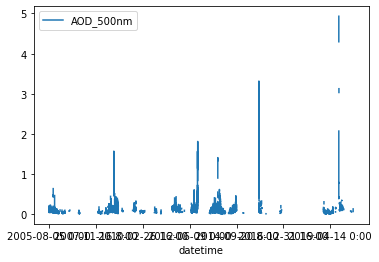

In [20]:
data.plot("datetime", "AOD_500nm")